In [1]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from matplotlib import pyplot
import pandas as pd

In [2]:
def get_dataset(file, n_features):
    df = pd.read_csv(file, sep=',', index_col=0)
    X = df.iloc[:, :n_features]
    y = df.iloc[:, n_features]
    return X, y

In [3]:
def get_models(svm_c, n_features):
    models = dict()
    for i in range(2, n_features):
        rfe = RFE(estimator=SVC(kernel='linear', C=svm_c), n_features_to_select=i)
        model = SVC(kernel='linear', C=svm_c)
        models[str(i)] = Pipeline(steps=[('s',rfe), ('m',model)])
    return models

In [4]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [5]:
def run_rfe(models, X, y):    
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    return results, names

In [6]:
def selected_features(svm_c, n, X, y):
    rfe = RFE(estimator=SVC(kernel='linear', C=svm_c), n_features_to_select=n)
    rfe.fit(X,y)
    cols = []
    for i in range(X.shape[1]):
        # print('Column: %d, Selected %s, Rank: % .3f' % (i, rfe.support_[i], rfe.ranking_[i]))
        if rfe.support_[i]:
            cols.append(X.columns[i])
    return cols

>2 0.882 (0.081)
>3 0.891 (0.099)
>4 0.907 (0.097)
>5 0.923 (0.095)
>6 0.929 (0.102)
>7 0.907 (0.110)
>8 0.926 (0.090)
>9 0.934 (0.089)
>10 0.942 (0.086)
>11 0.947 (0.082)
>12 0.945 (0.081)
>13 0.947 (0.082)
>14 0.950 (0.072)
>15 0.947 (0.071)
>16 0.955 (0.080)
>17 0.953 (0.084)
>18 0.953 (0.084)
>19 0.955 (0.072)
>20 0.955 (0.080)
>21 0.958 (0.072)
>22 0.960 (0.072)
>23 0.960 (0.072)
>24 0.960 (0.072)
>25 0.963 (0.069)
>26 0.958 (0.072)
>27 0.958 (0.072)
>28 0.955 (0.072)
>29 0.955 (0.072)
>30 0.952 (0.078)
>31 0.950 (0.078)
>32 0.950 (0.078)
>33 0.950 (0.078)
>34 0.950 (0.078)
>35 0.953 (0.072)
>36 0.953 (0.072)
>37 0.961 (0.066)
>38 0.958 (0.069)
>39 0.958 (0.069)
>40 0.955 (0.069)
>41 0.955 (0.069)
>42 0.955 (0.069)
>43 0.958 (0.066)
>44 0.961 (0.066)
>45 0.961 (0.066)
>46 0.958 (0.066)
>47 0.958 (0.066)
>48 0.958 (0.066)
>49 0.958 (0.066)
>50 0.958 (0.066)
>51 0.958 (0.066)
>52 0.958 (0.066)
>53 0.958 (0.066)
>54 0.958 (0.066)
>55 0.958 (0.066)
>56 0.958 (0.066)
>57 0.958 (0.066)


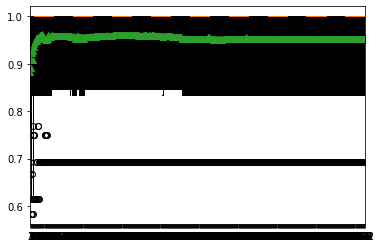

In [10]:
#MYCN
file = '../data-files/train.csv'
X,y = get_dataset(file, 663)
models = get_models(10, 663)
results, names = run_rfe(models, X, y)
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
selected_features(10, 25, X, y)

>2 0.875 (0.144)
>3 0.895 (0.137)
>4 0.895 (0.137)
>5 0.912 (0.117)
>6 0.920 (0.114)
>7 0.912 (0.117)
>8 0.912 (0.117)
>9 0.912 (0.117)
>10 0.912 (0.117)
>11 0.912 (0.117)
>12 0.912 (0.117)


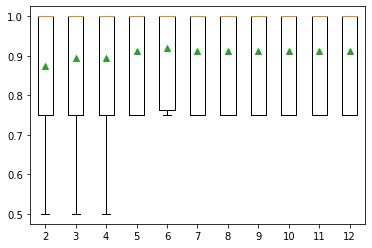

In [131]:
#RMA vs. CMN
file = 'rmacmn_ml.csv'
X,y = get_dataset(file, 12)
models = get_models(5,12)
results, names = run_rfe(models, X, y)
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [132]:
selected_features(5, 6, X, y)

['cg20180370',
 'cg09595050',
 'cg25940946',
 'cg19831706',
 'cg26709285',
 'cg19301114']

>2 0.893 (0.120)
>3 0.942 (0.098)
>4 0.955 (0.091)
>5 0.955 (0.091)
>6 0.972 (0.073)


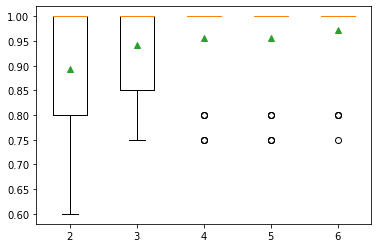

In [146]:
# RMN vs CMA
file = 'rmncma_top_7.csv'
X,y = get_dataset(file, 7)
models = get_models(5,7)
results, names = run_rfe(models, X, y)
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [143]:
selected_features(2, 4, X, y)

['cg08934976', 'cg24068468', 'cg15858166', 'cg04239994']